**Problem Statement:** Given a data sets containing comma seperated interger values both +ve and -ve, Find the mathematical relation between the two coloums


In [66]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# Data Collection And Visualization

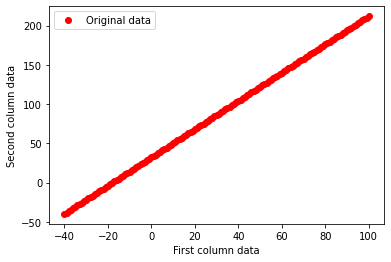

(141, 2)


,X,Y
count,141.000000,141.000000
mean,30.000000,86.000000
std,40.847277,73.525098
min,-40.000000,-40.000000
25%,-5.000000,23.000000
50%,30.000000,86.000000
75%,65.000000,149.000000
max,100.000000,212.000000


In [67]:
# give labels to both columns as x and y
column_names = ['X','Y']

# read data from csv using pandas
df = pd.read_csv('dataset.csv',names=column_names) 

# plotting the initial data from dataset to get rough estimate about the trend in data provided 
plt.plot(df['X'].tolist(), df['Y'].tolist(), 'ro', label='Original data')
plt.xlabel('First column data') 
plt.ylabel('Second column data')
plt.legend()
plt.show()


print(df.shape)
df.describe()

# Data Preparation

In [68]:
# Taking training data = 80% of toal data and test data = 20% of total data

train_data = df.sample(frac=0.8,random_state=0)
test_data = df.drop(train_data.index)


train_stats = train_data.describe()
train_stats.pop("Y")
train_stats = train_stats.transpose()
train_stats

# remove the label 'Y'. 
train_labels = train_data.pop('Y')
test_labels = test_data.pop('Y')

In [69]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_data)
normed_test_data = norm(test_data)

# Model Training and Parameter Tuning

In [70]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_data.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse'])
  return model

model = build_model()

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = model.fit(normed_train_data,train_labels,epochs=1000,validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.3576,  mae:0.5307,  mse:0.3576,  val_loss:0.0787,  val_mae:0.2114,  val_mse:0.0787,  
....................................................................................................
Epoch: 100, loss:0.3051,  mae:0.4737,  mse:0.3051,  val_loss:0.4794,  val_mae:0.5344,  val_mse:0.4794,  
....................................................................................................
Epoch: 200, loss:0.2859,  mae:0.4945,  mse:0.2859,  val_loss:0.0900,  val_mae:0.2546,  val_mse:0.0900,  
....................................................................................................
Epoch: 300, loss:0.3309,  mae:0.4926,  mse:0.3309,  val_loss:0.1215,  val_mae:0.3133,  val_mse:0.1215,  
....................................................................................................
Epoch: 400, loss:0.1507,  mae:0.3635,  mse:0.1507,  val_loss:0.3402,  val_mae:0.5453,  val_mse:0.3402,  
........................................................................

In [59]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
995,0.141592,0.141592,0.330990,0.111973,0.111973,0.253798,995
996,0.195624,0.195624,0.369792,0.339016,0.339016,0.514622,996
997,0.407134,0.407134,0.580833,0.190961,0.190961,0.382177,997
998,0.219320,0.219320,0.397327,0.070586,0.070586,0.256292,998
999,0.087581,0.087581,0.282072,0.079961,0.079961,0.265411,999


# Model Evaluation

In [61]:
# Results => mean squared error comes out to be 0.03 for test data

loss,mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Mean squared error for Test Data: {:5.2f} MPG".format(mse))

1/1 - 0s - loss: 0.0784 - mse: 0.0784 - mae: 0.2623
Mean squared error for Test Data:  0.26 MPG


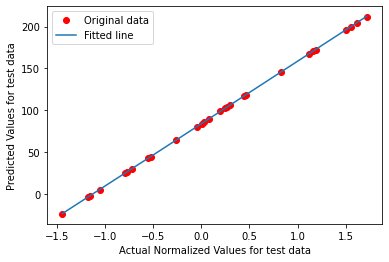

In [62]:
# plot the original test data as scattered points
plt.plot(normed_test_data, test_labels, 'ro', label='Original data')
plt.xlabel('Actual Normalized Values for test data')
plt.ylabel('Predicted Values for test data')
# Compute predictions for test data
y_pred = model.predict(normed_test_data) 

# Plot the linear regression line
plt.plot(normed_test_data, y_pred, label='Fitted line')
plt.legend()
plt.show()

In [63]:
def predict_output(X):
    output = model.predict(pd.DataFrame([norm(X)])).flatten()
    return output[0]

In [64]:
predict_output(55)

131.24487

In [65]:
predict_output(43)

109.60259

# Results

# Slope = 1.80116
# y-intercept = 32.11
# Equation : y=1.80*x+32.11